In [1]:
# Fix figure.dpi
%matplotlib inline
# Display exactly the figure that will be saved
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

from pathlib import Path
import tkinter

from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi']

100.0

In [3]:
root = tkinter.Tk()
screen_dpi = root.winfo_fpixels('1i')
screen_dpi

96.0

### Exercise 1

Figure size: 5.12 x 5.12 inches


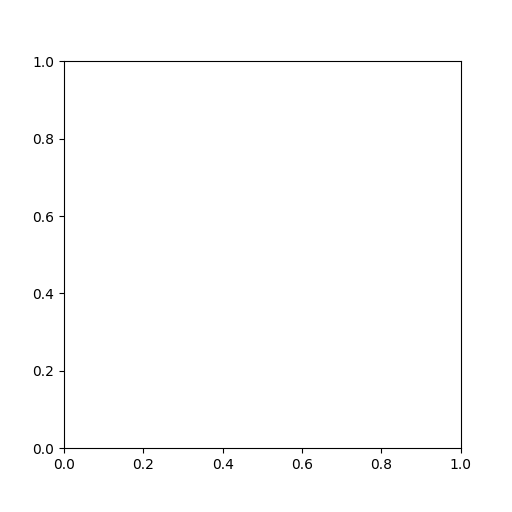

exercise_1.png PNG 512x512 512x512+0+0 8-bit sRGB 6287B 0.000u 0:00.000


In [4]:
pixels_width = 512
pixels_height = 512

dpi = 100
fig_width = pixels_width / dpi
fig_height = pixels_height / dpi
print(f'Figure size: {fig_width} x {fig_height} inches')

fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
file_path = Path('exercise_1.png')
plt.savefig(file_path, dpi=dpi)
plt.show()

!identify {file_path}

### Exercise 2

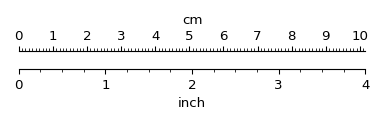

Image: exercise_2_tight_layout.png
  Format: PNG (Portable Network Graphics)
  Mime type: image/png
  Class: DirectClass
  Geometry: 384x124+0+0
  Resolution: 37.8x37.8
  Print size: 10.1587x3.28042


In [5]:
dpi = screen_dpi
inches = 4
cm_per_inch = 2.54

fig = plt.figure(figsize=(inches, 1.3), tight_layout=True, dpi=dpi)
ax = fig.add_subplot()
ax.set_xlim(0, inches)
ax.set_xlabel('inch')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

ax_top = ax.twiny()
ax_top.set_xlim(0, cm_per_inch * inches)
ax_top.set_xlabel('cm')
ax_top.spines['left'].set_visible(False)
ax_top.spines['right'].set_visible(False)
ax_top.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_top.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.savefig('exercise_2_tight_layout.png', dpi=dpi)
plt.show();

!identify -verbose exercise_2_tight_layout.png | head -7

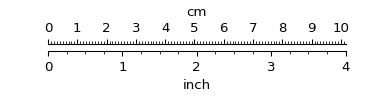

Image: exercise_2_no_tight_layout.png
  Format: PNG (Portable Network Graphics)
  Mime type: image/png
  Class: DirectClass
  Geometry: 384x96+0+0
  Resolution: 37.8x37.8
  Print size: 10.1587x2.53968


In [6]:
dpi = screen_dpi
inches = 4
cm_per_inch = 2.54

fig = plt.figure(figsize=(inches, 1), tight_layout=False, dpi=dpi)
ax = fig.add_subplot()
ax.set_xlim(0, inches)
ax.set_xlabel('inch')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_position(('axes', 0.45))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

ax_top = ax.twiny()
ax_top.set_xlim(0, cm_per_inch * inches)
ax_top.set_xlabel('cm')
ax_top.spines['left'].set_visible(False)
ax_top.spines['right'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
ax_top.spines['top'].set_position(('axes', 0.55))
ax_top.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_top.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.savefig('exercise_2_no_tight_layout.png', dpi=dpi)
plt.show();

!identify -verbose exercise_2_no_tight_layout.png | head -7

In [7]:
default_subplot_spacing = [(param, value) for param, value in plt.rcParams.items() if param.startswith('figure.subplot.')]
default_subplot_spacing

[('figure.subplot.bottom', 0.125),
 ('figure.subplot.hspace', 0.2),
 ('figure.subplot.left', 0.125),
 ('figure.subplot.right', 0.9),
 ('figure.subplot.top', 0.88),
 ('figure.subplot.wspace', 0.2)]

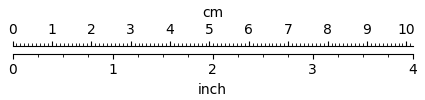

Image: exercise_2_no_tight_layout_margins.png
  Format: PNG (Portable Network Graphics)
  Mime type: image/png
  Class: DirectClass
  Geometry: 425x100+0+0
  Resolution: 39.37x39.37
  Print size: 10.795x2.54001


In [8]:
dpi = 100
cm_per_inch = 2.54
fig_width = 10.8 / cm_per_inch
fig_height = 1
margin = 0.25

fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)
plt.subplots_adjust(
    left=0.5*margin/fig_width,
    bottom=0.5*margin/fig_height,
    right=1-0.5*margin/fig_width,
    top=1-0.5*margin/fig_height
)

ax = fig.add_subplot()
ax.set_xlim(0, inches)
ax.set_xlabel('inch')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_position(('axes', 0.45))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

ax_top = ax.twiny()
ax_top.set_xlim(0, cm_per_inch * inches)
ax_top.set_xlabel('cm')
ax_top.spines['left'].set_visible(False)
ax_top.spines['right'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
ax_top.spines['top'].set_position(('axes', 0.55))
ax_top.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_top.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.savefig('exercise_2_no_tight_layout_margins.png', dpi=dpi)
plt.show();

!identify -verbose exercise_2_no_tight_layout_margins.png | head -7 

### Exercise 3

In [9]:
def curve():
    n = np.random.randint(1,5)
    centers = np.random.normal(0.0,1.0,n)
    widths = np.random.uniform(5.0,50.0,n)
    widths = 10*widths/widths.sum()
    scales = np.random.uniform(0.1,1.0,n)
    scales /= scales.sum()
    X = np.zeros(500)
    x = np.linspace(-3,3,len(X))
    
    for center, width, scale in zip(centers, widths, scales):
        X = X + scale*np.exp(- (x-center)*(x-center)*width)
        
    return X

In [10]:
default_subplot_spacing = [(param, value) for param, value in plt.rcParams.items() if param.startswith('figure.subplot.')]
default_subplot_spacing

[('figure.subplot.bottom', 0.125),
 ('figure.subplot.hspace', 0.2),
 ('figure.subplot.left', 0.125),
 ('figure.subplot.right', 0.9),
 ('figure.subplot.top', 0.88),
 ('figure.subplot.wspace', 0.2)]

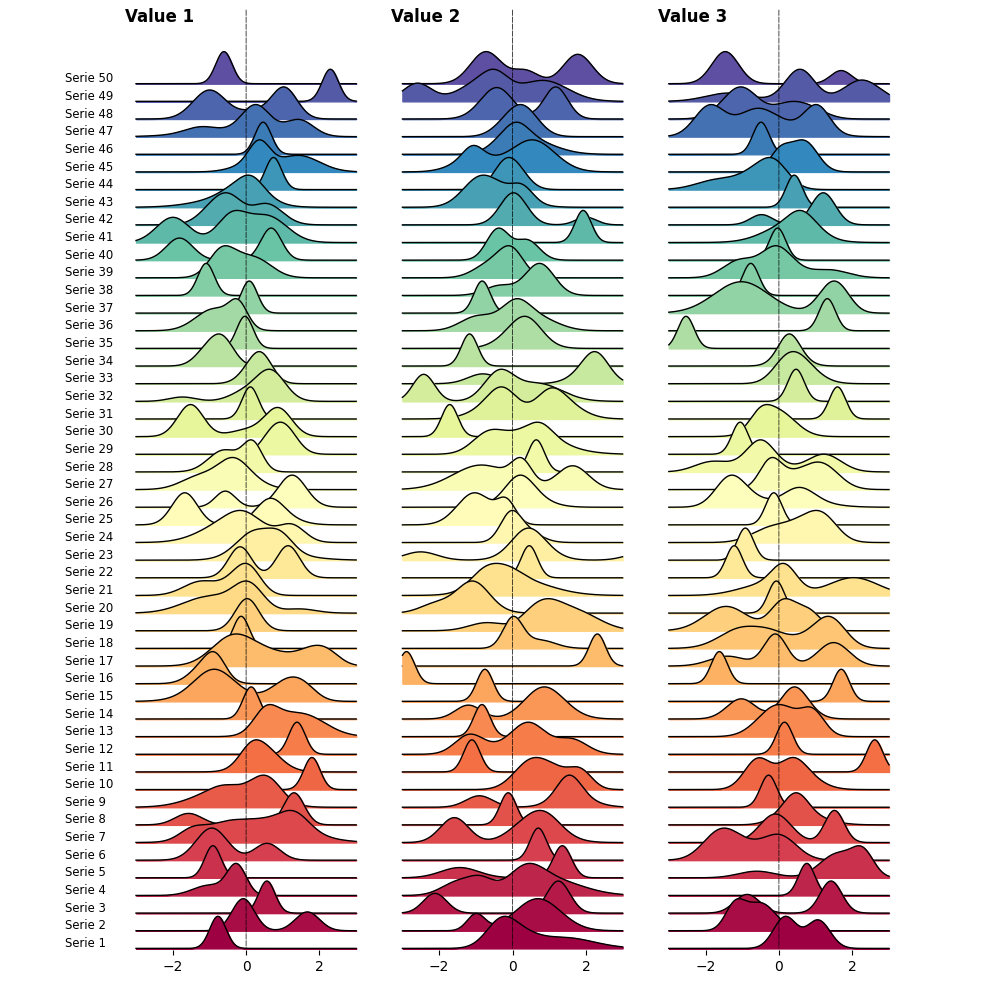

In [11]:
RANDOM_STATE = 25
np.random.seed(RANDOM_STATE)
rows = 50
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(10, rows*0.2), subplot_kw={'yticks': []})
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=-0.5, wspace=0.1)

row_names = [f'Serie {serie}' for serie in range(rows, 0, -1)]
col_names = [f'Value {value}' for value in range(1, cols + 1)]

for ax, name in zip(axs[:, 0], row_names):
    ax.set_ylabel(name, rotation=0, fontsize='small', loc='bottom', labelpad=40)
    
for ax, name in zip(axs[0], col_names):
    ax.set_title(name, fontsize='large', fontweight='bold', loc='left', pad=20)

c = 0
colors = (1. - c) * plt.get_cmap('Spectral')(np.linspace(0, 1, rows)) + c * np.ones((rows, 4))
colors = colors[::-1]

for idx in range(rows * cols):
    i = idx // cols
    j = idx % cols
    
    ax = axs[i][j]
    ax.set_facecolor('none')
    ax.spines[['left', 'top', 'right', 'bottom']].set_visible(False)
    
    if i != rows - 1:
        ax.get_xaxis().set_visible(False)
    
    y = curve()
    x = np.linspace(-3, 3, y.size)
    ax.plot(x, y, color='k', linewidth=1)
    ax.fill_between(x, y, color=colors[i])
    ax.set_zorder(i)

for col_idx in range(cols):
    coords = axs[0][col_idx].get_position()
    zero_x_coords = (coords.x1 + coords.x0) / 2
    conn = ConnectionPatch(xyA=(zero_x_coords, 0.99), xyB=(0, 0), 
                           coordsA='figure fraction', coordsB='data', 
                           axesA=axs[0, col_idx], axesB=axs[rows-1, col_idx],
                           zorder=rows, linewidth=0.5, linestyle=(0, (8, 2)), color='k')
    fig.add_artist(conn)

plt.show()